## Question 1 : The dataset is highly skewed toward the cities included in Delhi_NCR

### 1.1 number of restaurants present in Delhi NCR v/s Rest of India.

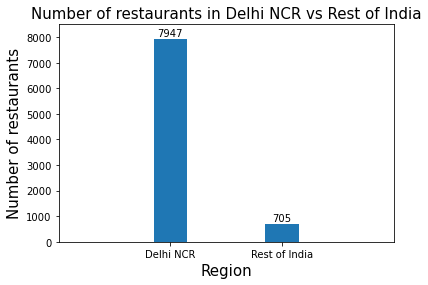

In [1]:
## quesstion 1.1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loadind csv file
data=pd.read_csv('datasets/zomato.csv', encoding = "ISO-8859-1")
df=data.copy()

df = df[df['Country Code']== 1] # Indian restaurants as country code of India is 1
# filtering with help of NCR cities
ncr = (df[(df["City"]=="Gurgaon")|(df["City"]=="New Delhi")|(df["City"]=="Ghaziabad")|(df["City"]=="Noida")|
                (df["City"]=="Faridabad")] )
# filtering for rest of India
roi = (df[(df["City"]!="Gurgaon")&(df["City"]!="New Delhi")&(df["City"]!="Ghaziabad")&(df["City"]!="Noida")&
                (df["City"]!="Faridabad")]) 
# list of NCR cities
ncr_cities=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']

## printinf the graph of Number of restaurants in Delhi NCR vs Rest of India

plt.bar(['Delhi NCR','Rest of India'],[len(ncr),len(roi)],width =0.3) # plotting bar graph
plt.title('Number of restaurants in Delhi NCR vs Rest of India',size=15) # printing the title
plt.axis([-1,2,0,8500]) # fixing the renge of axis
plt.text(0,len(ncr)+100,len(ncr),horizontalalignment='center')# printing the value 
plt.text(1,len(roi)+100,len(roi),horizontalalignment='center') # printing the value 
plt.xlabel('Region',size='15') # priting the x label
plt.ylabel('Number of restaurants',size=15) # printing the y label
plt.show()

### 1.2 cuisines which are not present in restaurant of Delhi NCR but present in rest of India

In [2]:
## question 1.2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loadind csv file
data=pd.read_csv('datasets/zomato.csv', encoding = "ISO-8859-1")
df=data.copy()

df = df[df['Country Code']== 1] # Indian restaurants as country code of India is 1
# filtering with help of NCR cities
ncr = (df[(df["City"]=="Gurgaon")|(df["City"]=="New Delhi")|(df["City"]=="Ghaziabad")|(df["City"]=="Noida")|
                (df["City"]=="Faridabad")] )
# filtering for rest of India
roi = (df[(df["City"]!="Gurgaon")&(df["City"]!="New Delhi")&(df["City"]!="Ghaziabad")&(df["City"]!="Noida")&
                (df["City"]!="Faridabad")]) 
# list of NCR cities
ncr_cities=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']

c_ncr=ncr['Cuisines'].str.split(',') # splitting the cuisines column to get each and every cuisine for Delhi-NCR region
c_roi=roi['Cuisines'].str.split(',') # splitting hte cuisines column to get each and every cuisine for rest of India

# making dictionary for NCR and Rest of India to get unique cuisines and get the count of that particular cuisine
cuisines_ncr={}
cuisines_roi={}
for s in c_ncr:
    for i in s:
        cuisines_ncr[i.strip()]=cuisines_ncr.get(i.strip(),0) +1
for s in c_roi:
    for i in s:
        cuisines_roi[i.strip()]=cuisines_roi.get(i.strip(),0) +1
# using set difference method to get the cuisines in rest of India which are not in NCR
diff= set(cuisines_roi.keys()).difference(set(cuisines_ncr.keys()))
print('cuisines which were not in NCR but in Rest of India:',end=' ')
print(diff) # printing the cusines which were not in NCR but in Rest of India
# getting cuisines for API

import requests as re
import json
header={'user-key':'USERKEY FROM ZOMATO API','Accept': 'application/json'}
city_id=[]
## getting city_id for NCR cities
for i in ncr_cities:
    c=re.get('https://developers.zomato.com/api/v2.1/cities',headers=header,params={'q':i})
    city=c.json()
    if city['location_suggestions']==[]: # checking whethe gicen city is in API or not
        continue
    city_id.append(city['location_suggestions'][0]['id']) # getting the city_id
cuisines_ncr_api=[]
## getting cuisine for NCR region
for i in city_id:
    r=re.get('https://developers.zomato.com/api/v2.1/cuisines',headers=header,params={'city_id':i})
    data=r.json()
    data=data['cuisines'] # getting the cuisines for given city_id
    for i in data:
        cuisines_ncr_api.append(i['cuisine']['cuisine_name']) #gettng the list of cuisines in NCR region

## here value is different from what we were getting previously
## to get what are the cuisines which were not in datasets of NCR but present in API we need to find intersection
ans=diff.intersection(cuisines_ncr_api) # cuisines which are in API but not in dataset
print('cuisines which are in API but not in dataset:',ans) # printing the answer

cuisines which were not in NCR but in Rest of India: {'BBQ', 'Cajun', 'Malwani', 'German'}
cuisines which are in API but not in dataset: {'BBQ', 'Malwani'}


### 1.3 top 10 cuisines served by Delhi_NCR and Rest of India

In [3]:
## question 1.3 
## finding top and bottom 10 cuisines in Delhi-NCR and Rest of India

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loadind csv file
data=pd.read_csv('datasets/zomato.csv', encoding = "ISO-8859-1")
df=data.copy()

df = df[df['Country Code']== 1] # Indian restaurants as country code of India is 1
# filtering with help of NCR cities
ncr = (df[(df["City"]=="Gurgaon")|(df["City"]=="New Delhi")|(df["City"]=="Ghaziabad")|(df["City"]=="Noida")|
                (df["City"]=="Faridabad")] )
# filtering for rest of India
roi = (df[(df["City"]!="Gurgaon")&(df["City"]!="New Delhi")&(df["City"]!="Ghaziabad")&(df["City"]!="Noida")&
                (df["City"]!="Faridabad")]) 
# list of NCR cities
ncr_cities=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']

c_ncr=ncr['Cuisines'].str.split(',') # splitting the cuisines column to get each and every cuisine for Delhi-NCR region
c_roi=roi['Cuisines'].str.split(',') # splitting hte cuisines column to get each and every cuisine for rest of India

# making dictionary for NCR and Rest of India to get unique cuisines and get the count of that particular cuisine
cuisines_ncr={}
cuisines_roi={}
for s in c_ncr:
    for i in s:
        cuisines_ncr[i.strip()]=cuisines_ncr.get(i.strip(),0) +1
for s in c_roi:
    for i in s:
        cuisines_roi[i.strip()]=cuisines_roi.get(i.strip(),0) +1


top_10_ncr = sorted(cuisines_ncr,key = cuisines_ncr.get,reverse=True)[:10]
top_10_roi = sorted(cuisines_roi,key = cuisines_roi.get,reverse=True)[:10]
bot_10_ncr = sorted(cuisines_ncr,key = cuisines_ncr.get,reverse=True)[-1:-11:-1]
bot_10_roi = sorted(cuisines_roi,key = cuisines_roi.get,reverse=True)[-1:-11:-1]
top_10_ncr_dict={}
top_10_roi_dict={}
bot_10_ncr_dict={}
bot_10_roi_dict={}
for i in range(10):
    top_10_ncr_dict[top_10_ncr[i]]=cuisines_ncr[top_10_ncr[i]]
    top_10_roi_dict[top_10_roi[i]]=cuisines_roi[top_10_roi[i]]
    bot_10_ncr_dict[bot_10_ncr[i]]=cuisines_ncr[bot_10_ncr[i]]
    bot_10_roi_dict[bot_10_roi[i]]=cuisines_roi[bot_10_roi[i]]

## printing top 10 cuisines used in all restaurants in NCR and rest of India
print('top 10 cuisines in restaurants of in NCR')
for i in top_10_ncr_dict:
    print(i,top_10_ncr_dict[i])
print()
print('top 10 cuisines in restaurants of in rest of India')
for i in top_10_roi_dict:
    print(i,top_10_roi_dict[i])


top 10 cuisines in restaurants of in NCR
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535

top 10 cuisines in restaurants of in rest of India
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


### 1.4 analysis of how cuisine served is different from Delhi NCR to Rest of India

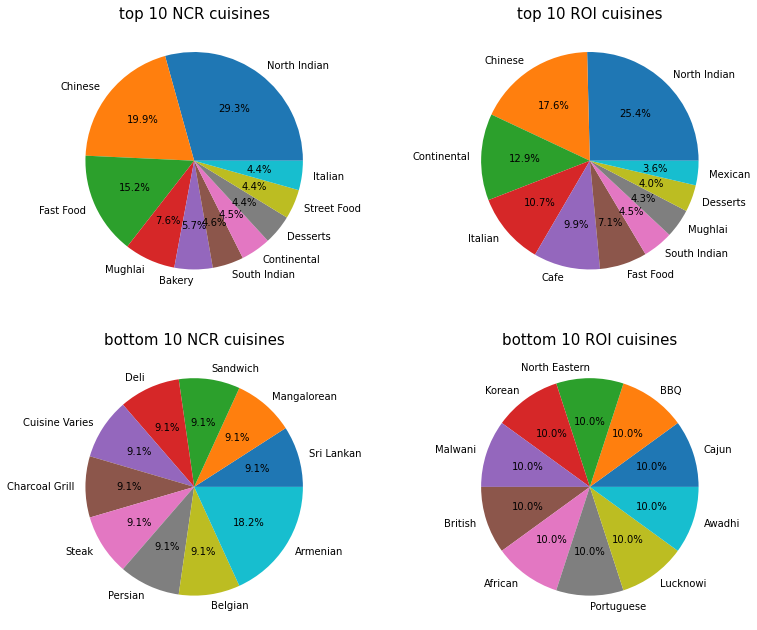

In [4]:
##question 1.4
#plotting top and bottom 10 cuisines for NCR and Rest of India
fig, a=plt.subplots(2,2,figsize=(13,11))

a[0,0].pie(top_10_ncr_dict.values(),autopct='%.1f%%',labels=top_10_ncr_dict.keys())
a[0,0].set_title('top 10 NCR cuisines',size=15)
a[0,1].pie(top_10_roi_dict.values(),autopct='%.1f%%',labels=top_10_roi_dict.keys())
a[0,1].set_title('top 10 ROI cuisines',size=15)
a[1,0].pie(bot_10_ncr_dict.values(),autopct='%.1f%%',labels=bot_10_ncr_dict.keys())
a[1,0].set_title('bottom 10 NCR cuisines',size=15)
a[1,1].pie(bot_10_roi_dict.values(),autopct='%.1f%%',labels=bot_10_roi_dict.keys())
a[1,1].set_title('bottom 10 ROI cuisines',size=15)
plt.show()


## Question 2 : User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

### 2.1 Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

### 2.1.1 number of votes given restaurants.

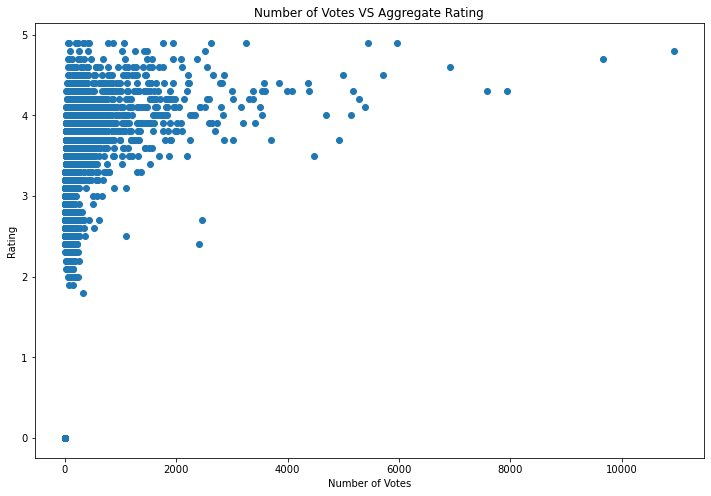

In [5]:
## question 2.1.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind csv file
data = pd.read_csv('datasets/zomato.csv',encoding = "ISO-8859-1")
df = data.copy()
df = df[df['Country Code']== 1] # Indian restaurants as country code of India is 1

ratings=df['Aggregate rating'] #Aggregate rating column
votes=df['Votes'] #Votes column
np_ratings=np.array(ratings) #numpy array for np_ratings column 
np_votes=np.array(votes) #numpy array for votes column
 
# plotting graph of Votes v/s ratings
plt.subplots(figsize=(12,8)) #fixing the size of graph
plt.scatter(np_votes,np_ratings) #printing the scatter plot
plt.title('Number of Votes VS Aggregate Rating')  #printing the title
plt.ylabel('Rating') # printing x label
plt.xlabel('Number of Votes') #printing y label
plt.show() 

### 2.1.2 restaurant serving more number of cuisines

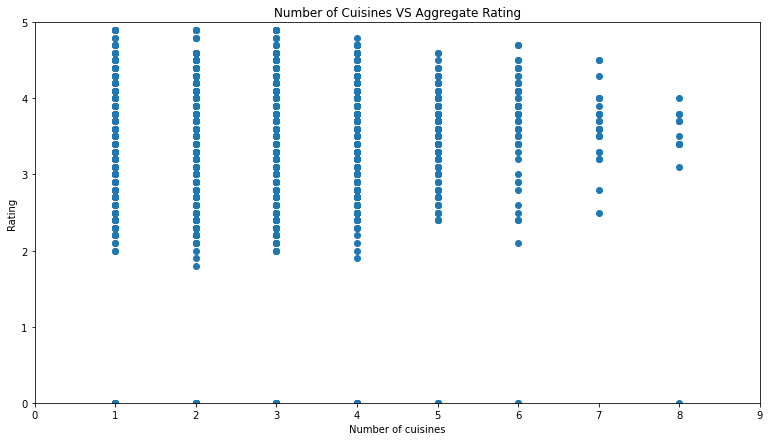

In [6]:
#question 2.1.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind csv file
data = pd.read_csv('datasets/zomato.csv',encoding = "ISO-8859-1")
df = data.copy()
df = df[df['Country Code']== 1] # Indian restaurants as country code of India is 1

ratings=df['Aggregate rating'] #Aggregate rating column
cuisines= df['Cuisines'].apply(lambda x: str(x).split(','))
# finding no of cuisines offered in a restaurant
no_of_cuisines=[]
for i in cuisines:
    no_of_cuisines.append(len(i)) #geting the no of cuisines offered by a restaurant

# plotting graph of Number of Cuisines VS Aggregate Rating
plt.subplots(figsize=(13,7)) #fixing the size of the graph
plt.scatter(no_of_cuisines,ratings)  # printing the scatter plot
plt.title('Number of Cuisines VS Aggregate Rating') ##printing the title
plt.axis([0,9,0,5])
plt.ylabel('Rating') #printing the y label
plt.xlabel('Number of cuisines') #printing the x labe;
plt.show() 

### 2.1.3 average cost of restaurant

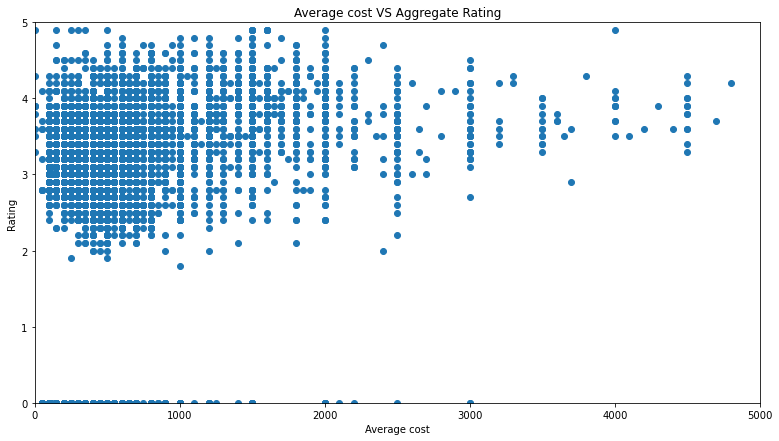

In [7]:
## question 2.1.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind csv file
data = pd.read_csv('datasets/zomato.csv',encoding = "ISO-8859-1")
df = data.copy()
df = df[df['Country Code']== 1] # Indian restaurants as country code of India is 1

df_new = df[df['Average Cost for two']<5000] ## taking <5000 as only 50 values are there with >5000rs
ratings=df_new['Aggregate rating'] #Aggregate rating column
avg_cost=df_new['Average Cost for two'] # geting the avg cost

plt.subplots(figsize=(13,7)) #fixing the size of graph
plt.scatter(avg_cost,ratings) # plotting the scatter plot
plt.title('Average cost VS Aggregate Rating') # printing the title
plt.ylabel('Rating') #printing the y label
plt.axis([0,5000,0,5])
plt.xlabel('Average cost') #printing the x label
plt.show() 


### 2.1.4 restaurants serving some specific cuisines.

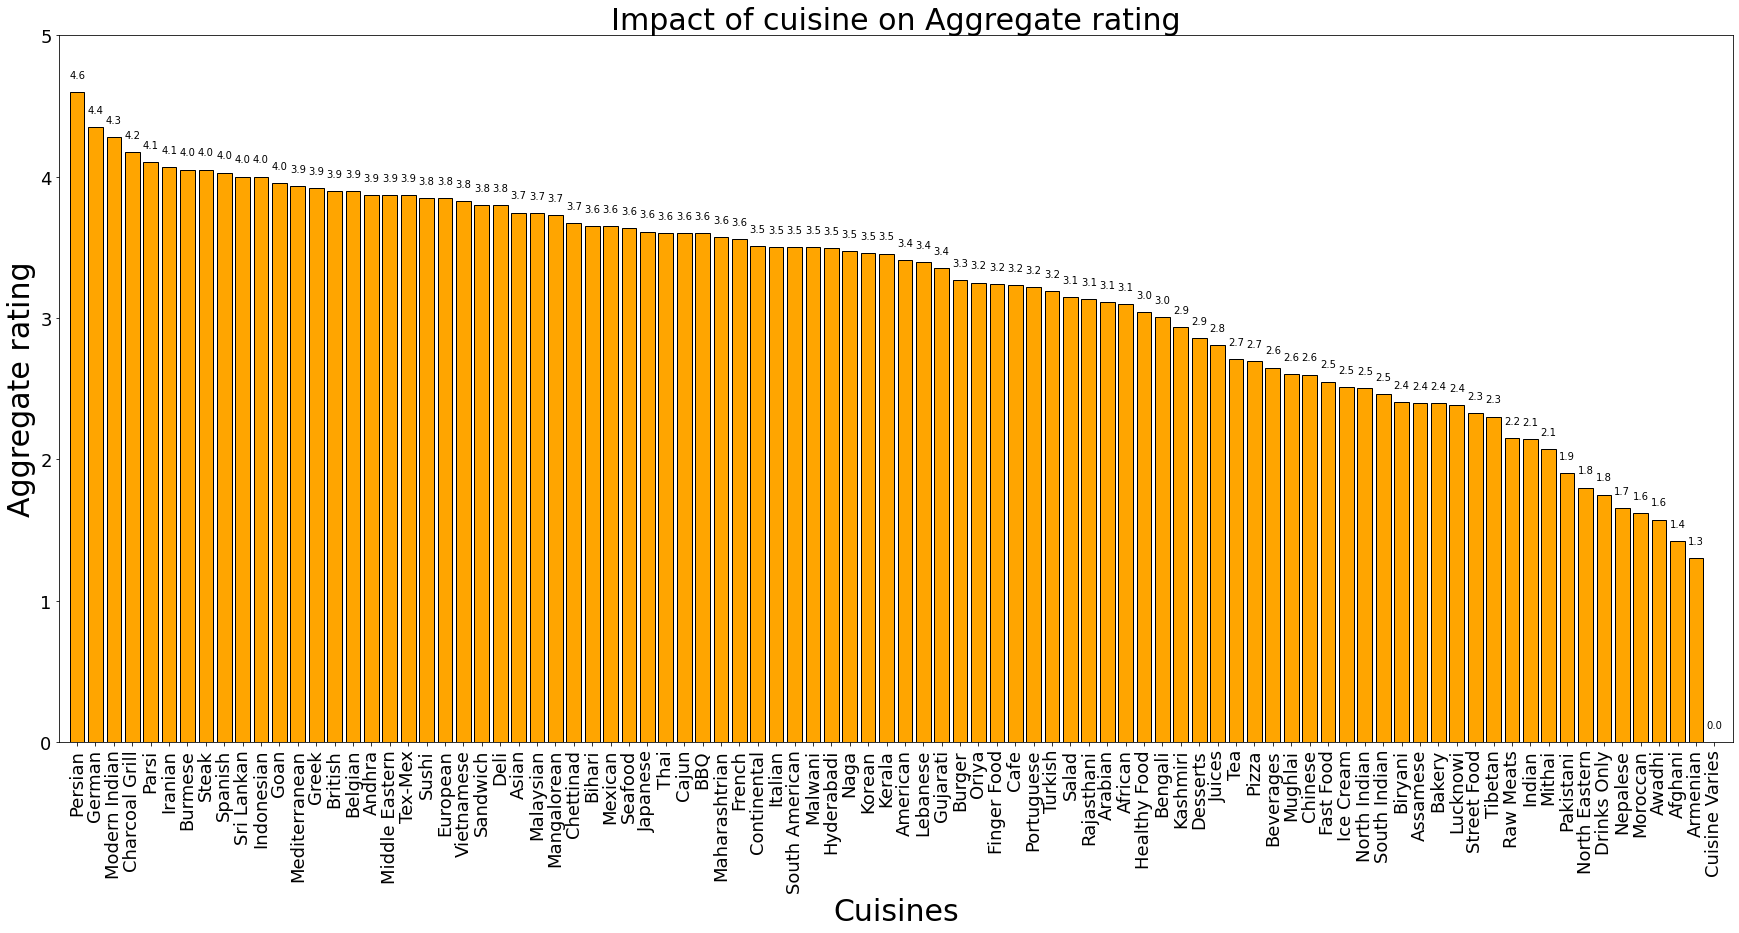

In [8]:
# question 2.1.4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loadind csv file
data=pd.read_csv('datasets/zomato.csv', encoding = "ISO-8859-1")
df=data.copy()

df= df[df['Country Code']== 1] # Indian restaurants as country code of India is 1

df['Cuisines'].dropna(inplace=True) # removing the None value from cuisines

def make_list(s):
    s=s.split(',')
    l=[]
    for i in s:
        l.append(i.strip())
    return l

df['Cuisines']=df['Cuisines'].apply(make_list) # making a list of cuisines given 
df['List']=df['Cuisines'] # added a column of list of cuisine
ans=[]
for i in df.values:
    for j in i[-1]:
        ans.append([i[-5],j.strip()]) #getting 2D array having rating and cuisine 
special_cuisines=pd.DataFrame(ans,columns=['Rating','Cuisine']) # making a dataframe for cuisine and rating
group=special_cuisines.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False) # geeting the average rating of cuisine

plt.subplots(figsize=(30,13)) #fixing the size of graph
plt.bar(group.index,group.values,color='orange',edgecolor='black') # plottng the graph
plt.xlabel('Cuisines',size=30) # printing x label
plt.ylabel('Aggregate rating',size=30)#printing y label
plt.title('Impact of cuisine on Aggregate rating',size=30) # printing the title

plt.axis([-1,90,0,5]) # fixing the range of axis

## printing the text
a=[i for i in range(0,len(group),1)] # getting x_pos
b=[i for i in group.values ] # getting y_pos
for i in range(len(group)):
    plt.text(a[i],b[i]+0.1,round(group.values[i],1),horizontalalignment='center') ## printing the text on graph
plt.xticks(size=18)
plt.yticks(size=18)
plt.xticks(rotation=90)
plt.show()

### 2.2 top 10 localities with more weighted restaurant rating

In [9]:
## question 2.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind csv file
data = pd.read_csv('datasets/zomato.csv',encoding = "ISO-8859-1")
df = data.copy()
df=df[df['Country Code']==1] # getting data only for India

group=df.groupby('Locality') # grouping by locality
ans=[]
for k,g in group:
    ans.append([(((g['Aggregate rating']*g['Votes']).sum()))/(g['Votes'].sum()),k.strip()])

weighted=pd.DataFrame(sorted(ans,reverse=True))
weighted.dropna(inplace=True)
weighted.reset_index(drop=True,inplace=True)

for i in range(10):
    print(weighted.values[i][1],round(weighted.values[i][0],2)) # printing top 10 locality

<ipython-input-9-2366b528d69d>:14: RuntimeWarning: invalid value encountered in double_scalars
  ans.append([(((g['Aggregate rating']*g['Votes']).sum()))/(g['Votes'].sum()),k.strip()])


Aminabad 4.9
Friends Colony 4.89
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Sector 5, Salt Lake 4.71
Chittoor Road 4.6
Arambol 4.6
Marathahalli 4.58
Anjuna 4.54
Ellis Bridge 4.44



## Question 3 : Visualization


### 3.1 bar graph of top 15 restaurants have a maximum number of outlets

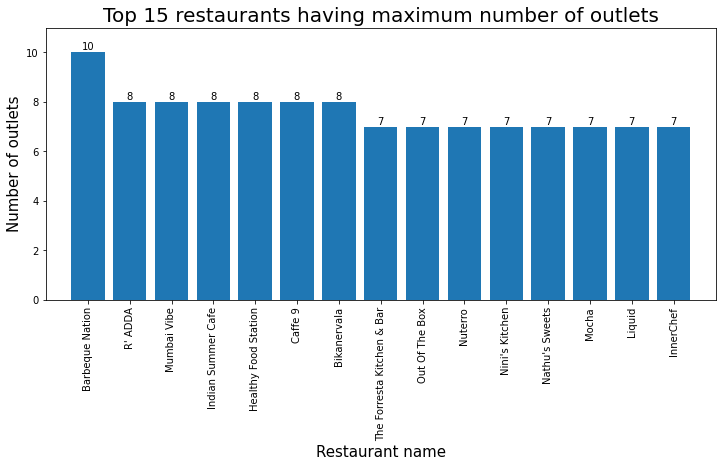

In [10]:
## question 3.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind csv file
data = pd.read_csv('datasets/zomato.csv',encoding = "ISO-8859-1")
df = data.copy()
df=df[df['Country Code']==1] # getting data only for India

grouping=df.groupby("Restaurant Name") # grouping by restaurant name to get the outlets

ans=[]

for key,group in grouping:
    
    c=set()
    
    for i in group["Cuisines"].values:
        l=i.split(",")
        
        for j in l:
            c.add(j.strip())
            
    ans.append([len(c),key.strip()])
    
ans=sorted(ans,reverse=True) # sorting the lsit in descending order
x=[]
y=[]

for row in ans[:15]: # getting x and y axis for top 15
    x.append(row[1])
    y.append(row[0])

plt.subplots(figsize=(12,5)) #fixing the size of graph
plt.bar(x,y) # plottng the graph
plt.xlabel('Restaurant name',size=15) # printing x label
plt.ylabel('Number of outlets',size=15)#printing y label
plt.title('Top 15 restaurants having maximum number of outlets',size=20) # printing the title

plt.axis([-1,15,0,11]) # fixing the range of axis

## printing the text
a=[i for i in range(0,16,1)] # getting x_pos
b=[i for i in y ] # getting y_pos
for i in range(15):
    plt.text(a[i],b[i]+0.1,y[i],horizontalalignment='center') ## printing the text on graph

plt.xticks(rotation=90)
plt.show()

### 3.2 histogram of aggregate rating of restaurant

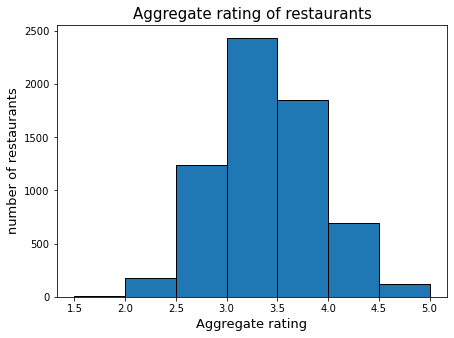

In [11]:
## question 3.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind csv file
data = pd.read_csv('datasets/zomato.csv',encoding = "ISO-8859-1")
df = data.copy()
df=df[df['Country Code']==1] # getting data only for India

rating=df[df['Aggregate rating']!=0.0]['Aggregate rating'] # getting theaggregate rating which are not zero

plt.subplots(figsize=(7,5)) # fixing the size of graph
bin=[1.5,2,2.5,3,3.5,4,4.5,5] # making the bins for graph
plt.hist(rating,bins=bin,width=0.5,edgecolor='black') # plottig the graph
plt.xlabel('Aggregate rating',size=13) # printing x label
plt.ylabel('number of restaurants',size=13) # printing y label
plt.title('Aggregate rating of restaurants',size=15) # printing title
plt.show()

### 3.3  bar graph top 10 restaurants in the data with the highest number of votes.

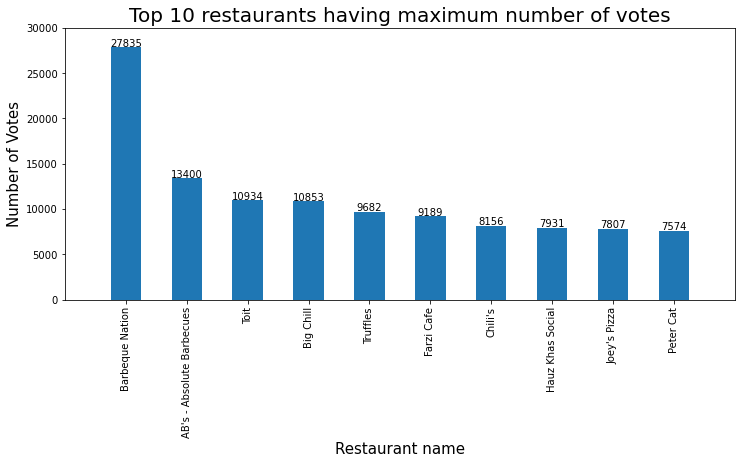

In [12]:
## question 3.3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind csv file
data = pd.read_csv('datasets/zomato.csv',encoding = "ISO-8859-1")
df = data.copy()
df=df[df['Country Code']==1] # getting data only for India

#grouping by restaurant name as same name might be in different location but it is the same restaurant 
votes=df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)[:10]
name=votes.index
count=votes.values
    
plt.subplots(figsize=(12,5)) # fixing the sixe of graph
plt.bar(name,count,width=0.5) # plotting the bar graph
plt.xlabel('Restaurant name',size=15)  #printing the x label
plt.ylabel('Number of Votes',size=15) # printing the y label
plt.axis([-1,10,0,30000]) # fixing the range of axis

## printing the text
x=[i for i in range(0,10,1)] # getting x_pos
y=[i for i in votes.values] # getting y_pos
for i in range(10):
    plt.text(x[i],y[i]+100,y[i],horizontalalignment='center') ## printing the text on graph
plt.title('Top 10 restaurants having maximum number of votes',size=20)#printing the title
plt.xticks(rotation=90)
plt.show()


### 3.4 pie graph of top 10 cuisines present in restaurants in the USA.

F:\Python\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


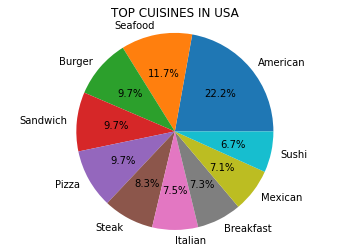

In [13]:
## question 3.4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind csv file
data = pd.read_csv('datasets/zomato.csv',encoding = "ISO-8859-1")
df = data.copy()

#getting the restaurants data for USA country using its country code (216)
usa=df[df['Country Code']== 216]
usa['Cuisines'].dropna(inplace=True) # removing None values

# splitting the cuisines from table
cuisines=usa['Cuisines'].str.split(',') # splitting the cuisines column to get each and every cuisine for Delhi-NCR region

# making dictionary for USA restaurants to get unique cuisines and get the count of that particular cuisine
cuisines_usa={}
for s in cuisines:
    for i in s:
        cuisines_usa[i.strip()]=cuisines_usa.get(i.strip(),0) +1 # updating the dictionary
top_10_cuisines= sorted(cuisines_usa,key= cuisines_usa.get,reverse=True)[:10] # finding top 10 cuisines name
values=[]

for i in top_10_cuisines:
    values.append(cuisines_usa[i]) # getting count of perticular cuisines in USA restaurants
plt.pie(values,autopct='%.1f%%',labels=top_10_cuisines) #plotting pie chart
plt.axis('equal') # making the graph a  perfect circle
plt.title("TOP CUISINES IN USA")
plt.show()

### 3.5 bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble

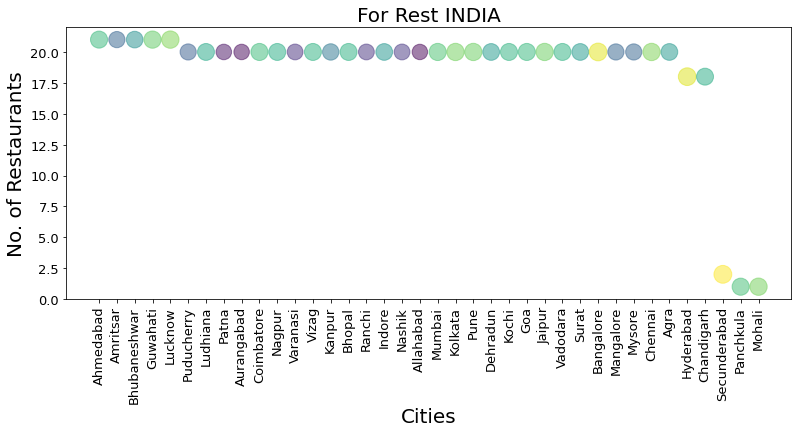

In [15]:
## question 3.5 for rest of India

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind csv file
data = pd.read_csv('datasets/zomato.csv',encoding = "ISO-8859-1")
df = data.copy()
# geting only Indian restaurants
#india=df[df['Country Code']== 1]  # getting data only for India
# making a dictionary with city name as keys and no of restaurants as its value
city=dict(roi['City'].value_counts())

# getting weighted rating according to the city
roi['rating']=(roi['Aggregate rating']*roi['Votes'])
rating=roi.groupby('City')['rating'].sum() # grouping by ciy name  and making sum
vote=roi.groupby('City')['Votes'].sum() # grouping by city name and getting total votes in a city
weighted_rating = dict(rating/vote) #getting weighted rating of city restaurants

# setting the size of bubble
size=[]
for i in city:
    size.append(weighted_rating.get(i)*70) #multiplied by 70 to get the clear visual difference in the size of different bubbles

# plotting the graph    
plt.subplots(figsize=(13,5)) # setting the size of graph
plt.scatter(city.keys(),city.values(),sizes=size,c=size,alpha=0.5)
plt.xlabel("Cities",size=20)
plt.ylabel("No. of Restaurants",size=20)
plt.title("For Rest INDIA",size=20)
plt.xticks(size=13,rotation=90)
plt.yticks(size=13)

plt.show()

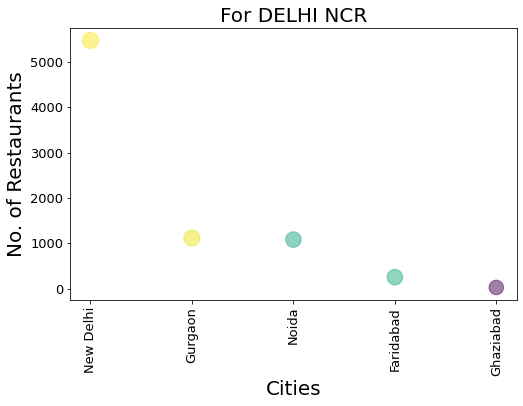

In [16]:
## question 3.5 for Delhi_NCR

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind csv file
data = pd.read_csv('datasets/zomato.csv',encoding = "ISO-8859-1")
df = data.copy()
# geting only Indian restaurants
# making a dictionary with city name as keys and no of restaurants as its value
city=dict(ncr['City'].value_counts())

# getting weighted rating according to the city
ncr['rating']=(ncr['Aggregate rating']*ncr['Votes'])
rating=ncr.groupby('City')['rating'].sum() # grouping by ciy name  and making sum
vote=ncr.groupby('City')['Votes'].sum() # grouping by city name and getting total votes in a city
weighted_rating = dict(rating/vote) #getting weighted rating of city restaurants

# setting the size of bubble
size=[]
for i in city:
    size.append(weighted_rating.get(i)*70) #multiplied by 70 to get the clear visual difference in the size of different bubbles

# plotting the graph    
plt.subplots(figsize=(8,5)) # setting the size of graph
plt.scatter(city.keys(),city.values(),sizes=size,c=size,alpha=0.5)
plt.xlabel("Cities",size=20)
plt.ylabel("No. of Restaurants",size=20)
plt.title("For DELHI NCR",size=20)
plt.xticks(size=13,rotation=90)
plt.yticks(size=13)
plt.show()